In [1]:
import sys; sys.path.append('..')

In [2]:
from data.data_location import DataLocation
from data.goprodehazing2017_data import get_train_val_test_data
dataloc = DataLocation(directory='/group/jug/USERNAME/data/goproDeblurring2017/GOPRO_Large', datasplit_type='test')
data_dict = get_train_val_test_data(dataloc)


Loading test data


100%|██████████| 1111/1111 [02:12<00:00,  8.37it/s]


In [3]:
from disentangle.core.tiff_reader import load_tiff
data_30 = load_tiff('/group/jug/USERNAME/indiSplit/predictions/2502_goPro2017dehazing-indi-l1_27/predictions_AssumedT-0.3.tif')
data_50 = load_tiff('/group/jug/USERNAME/indiSplit/predictions/2502_goPro2017dehazing-indi-l1_27/predictions_AssumedT-0.5.tif')
data_70 = load_tiff('/group/jug/USERNAME/indiSplit/predictions/2502_goPro2017dehazing-indi-l1_27/predictions_AssumedT-0.7.tif')
data_100= load_tiff('/group/jug/USERNAME/indiSplit/predictions/2502_goPro2017dehazing-indi-l1_27/predictions_AssumedT-1.0.tif')

[346, 444, 915]


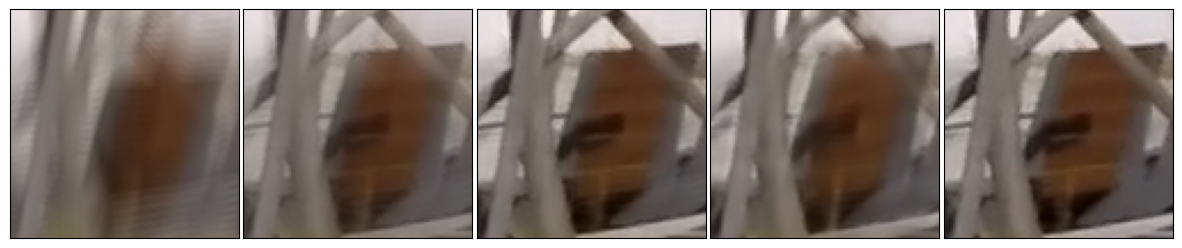

In [88]:
import matplotlib.pyplot as plt
import numpy as np
from disentangle.analysis.plot_utils import clean_ax

_,ax = plt.subplots(figsize=(15,3), ncols=5,nrows=1)
 
index = np.random.randint(0, len(data_30))
raw_inp = data_dict[1][index].transpose(1,2,0)
tar =data_dict[0][index].transpose(1,2,0)
syn_inp = (0.5* raw_inp + 0.5*tar).astype(np.uint8)
H,W = raw_inp.shape[:2]
sz = 100
hs = np.random.randint(0, H-sz)
ws = np.random.randint(0, W-sz)

ax[0].imshow(raw_inp[hs:hs+sz, ws:ws+sz])
ax[1].imshow(syn_inp[hs:hs+sz, ws:ws+sz])
ax[2].imshow(data_50[index][hs:hs+sz, ws:ws+sz])
ax[3].imshow(data_100[index][hs:hs+sz, ws:ws+sz])
ax[4].imshow(tar[hs:hs+sz, ws:ws+sz])

clean_ax(ax)
# reduce the space between the plots
plt.subplots_adjust(wspace=0.02, hspace=0.02)
print(f'[{index}, {hs}, {ws}]')


In [19]:
print(f'[{index}, {hs}, {ws}]')

[370, 49, 1022]


In [89]:
intesting_indices = [
    [370, 49, 1022],
    [1101, 453, 252],
    [540, 91, 1046],
    [141, 32, 924],
    [346, 444, 915]




]

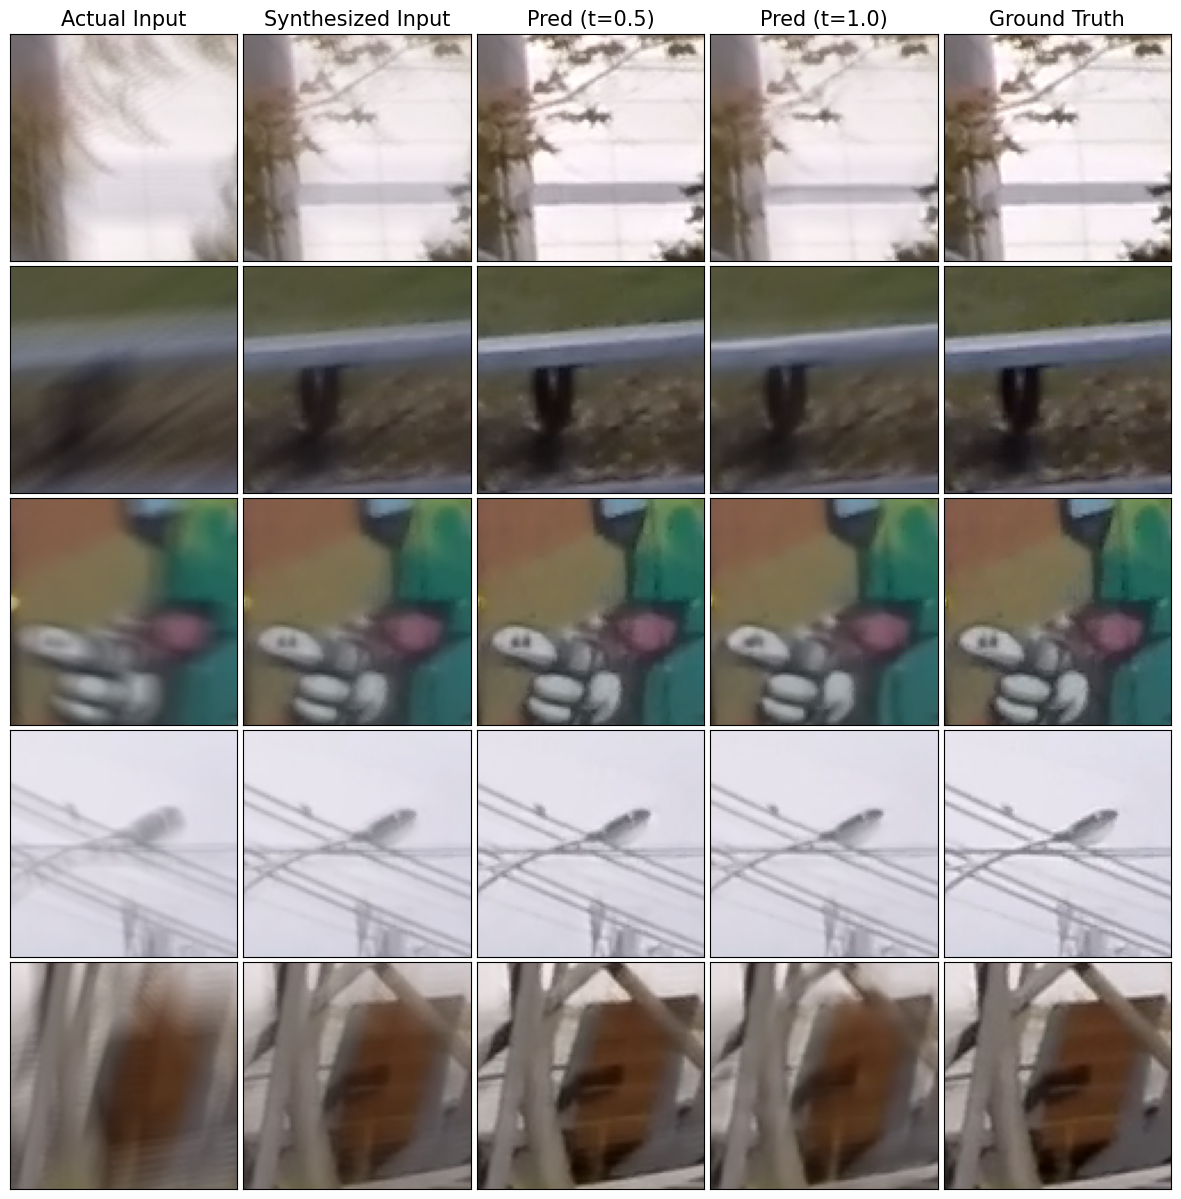

In [95]:
outputfpath = '/group/jug/USERNAME/indiSplitResults/gopro_qualitative.png'
_,ax = plt.subplots(figsize=(15,15), ncols=5,nrows=5)
for i in range(5):
    index = intesting_indices[i][0]
    hs = intesting_indices[i][1]
    ws = intesting_indices[i][2]
    raw_inp = data_dict[1][index].transpose(1,2,0)
    tar =data_dict[0][index].transpose(1,2,0)
    syn_inp = (0.5* raw_inp + 0.5*tar).astype(np.uint8)
    ax[i,0].imshow(raw_inp[hs:hs+sz, ws:ws+sz])
    ax[i,1].imshow(syn_inp[hs:hs+sz, ws:ws+sz])
    ax[i,2].imshow(data_50[index][hs:hs+sz, ws:ws+sz])
    ax[i,3].imshow(data_100[index][hs:hs+sz, ws:ws+sz])
    ax[i,4].imshow(tar[hs:hs+sz, ws:ws+sz])
    clean_ax(ax[i])

plt.subplots_adjust(wspace=0.02, hspace=0.02)
ax[0,0].set_title('Actual Input', fontsize=15)
ax[0,1].set_title('Synthesized Input', fontsize=15)
ax[0,2].set_title('Pred (t=0.5)', fontsize=15)
ax[0,3].set_title('Pred (t=1.0)', fontsize=15)
ax[0,4].set_title('Ground Truth', fontsize=15)

plt.savefig(outputfpath, bbox_inches='tight', dpi=300)